<a href="https://colab.research.google.com/github/BhagyaSri-1806/DataAnalyst/blob/main/SOMA_Advanced_Customer_Churn_Analysis_(11_12_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:


data = pd.read_csv('/content/Telecom_Churn_Dataset.csv')


In [ ]:
data

,Customer ID,Tenure,Monthly Charges,Total Charges,Churn
0,C0001,39,79.89,316.76,No
1,C0002,52,89.48,4437.00,No
2,C0003,29,108.05,1127.15,Yes
3,C0004,15,82.44,76.87,No
4,C0005,43,49.56,280.87,No
...,...,...,...,...,...
195,C0196,43,33.27,2213.50,Yes
196,C0197,29,116.95,1899.16,No
197,C0198,36,91.46,607.64,No
198,C0199,13,24.11,5360.50,Yes


# **1. Data Loading and Initial Inspection**

# 1.	Load the telecom dataset into a Pandas DataFrame.

In [ ]:
# prompt: code for Load the telecom dataset into a Pandas DataFrame

import pandas as pd

# Assuming the file is in the current working directory of the Colab environment.
# If it's in a different location, adjust the path accordingly.
try:
    data = pd.read_csv('/content/Telecom_Churn_Dataset.csv')
    print(data.head()) # Display first few rows
except FileNotFoundError:
    print("Error: Telecom_Churn_Dataset.csv not found. Please upload the file or provide the correct path.")
except Exception as e:
    print(f"An error occurred: {e}")

  Customer ID  Tenure  Monthly Charges  Total Charges Churn
0       C0001      39            79.89         316.76    No
1       C0002      52            89.48        4437.00    No
2       C0003      29           108.05        1127.15   Yes
3       C0004      15            82.44          76.87    No
4       C0005      43            49.56         280.87    No


# 2.	Print the column names, data types, and descriptive statistics.

In [ ]:
# prompt: Print the column names, data types, and descriptive statistics.

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      200 non-null    object 
 1   Tenure           200 non-null    int64  
 2   Monthly Charges  200 non-null    float64
 3   Total Charges    200 non-null    float64
 4   Churn            200 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 7.9+ KB
None
          Tenure  Monthly Charges  Total Charges
count  200.00000       200.000000     200.000000
mean    30.32500        69.863900    2148.774600
std     17.39027        28.380849    1686.961612
min      1.00000        20.050000      40.670000
25%     15.00000        46.807500     790.075000
50%     29.50000        67.755000    1750.475000
75%     44.00000        91.287500    3051.087500
max     60.00000       119.770000    6693.210000


# 3.	Check for missing values and duplicates in the dataset.

In [ ]:
# prompt: Check for missing values and duplicates in the dataset.

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())


Customer ID        0
Tenure             0
Monthly Charges    0
Total Charges      0
Churn              0
dtype: int64
0


# 4.	Summarize the target variable (Churn) distribution.

In [ ]:
# prompt: Summarize the target variable (Churn) distribution.

print(data['Churn'].value_counts())
print(data['Churn'].value_counts(normalize=True))

Churn
No     149
Yes     51
Name: count, dtype: int64
Churn
No     0.745
Yes    0.255
Name: proportion, dtype: float64


# •	Overview of the dataset.



**Customer ID:** Object (Unique identifier for customers)

**Tenure:** Integer (Duration in months the customer has been with the company)

**Monthly Charges:**  Float (Monthly amount charged to the customer)

**Total Charges:** Float (Cumulative charges over the tenure period)

**Churn:** Object (Target variable indicating whether the customer churned: "Yes" or "No")

**Missing Values**
No missing values detected in the dataset.

**Duplicate Rows**
No duplicate rows present in the dataset.


# •	Insights on missing values, duplicates, and churn distribution.

**Missing Values:**

There are no missing values in the dataset, meaning all the data is complete and ready for analysis.

**Duplicate Rows:**

The dataset contains no duplicate rows, so all records are unique and valid.

**Churn Distribution:**

74.5% of customers (149 out of 200) have not churned (stayed with the company).
25.5% of customers (51 out of 200) have churned (left the company).

This indicates an imbalanced dataset, which may require special handling during modeling to ensure fairness.

# **2. Data Cleaning and Preprocessing**

# 1.	Handle missing values:

o	Impute numerical columns with median or mean.

o	Impute categorical columns with the mode.


In [ ]:
# prompt: 	Handle missing values:


# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Impute numerical columns with the median
for col in numerical_cols:
    if data[col].isnull().any():  # Check if there are any missing values in the column
        data[col] = data[col].fillna(data[col].median())

# Impute categorical columns with the mode
for col in categorical_cols:
    if data[col].isnull().any():  # Check if there are any missing values in the column
        data[col] = data[col].fillna(data[col].mode()[0])

# Verify if there are any more missing values
print(data.isnull().sum())

Customer ID        0
Tenure             0
Monthly Charges    0
Total Charges      0
Churn              0
dtype: int64


# 2.	Remove duplicate rows, if any.

In [ ]:
# prompt: 2.	Remove duplicate rows, if any.

# Remove duplicate rows
data = data.drop_duplicates()

# Verify if duplicates are removed
print(data.duplicated().sum())

0


3.	Convert all categorical features into numeric using one-hot encoding.

In [ ]:
# prompt: 3.	Convert all categorical features into numeric using one-hot encoding.

# Perform one-hot encoding on categorical features
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the updated DataFrame
print(data.head())
print(data.info())

   Tenure  Monthly Charges  Total Charges  Customer ID_C0002  \
0      39            79.89         316.76              False   
1      52            89.48        4437.00               True   
2      29           108.05        1127.15              False   
3      15            82.44          76.87              False   
4      43            49.56         280.87              False   

   Customer ID_C0003  Customer ID_C0004  Customer ID_C0005  Customer ID_C0006  \
0              False              False              False              False   
1              False              False              False              False   
2               True              False              False              False   
3              False               True              False              False   
4              False              False               True              False   

   Customer ID_C0007  Customer ID_C0008  ...  Customer ID_C0192  \
0              False              False  ...              Fal

# 	Cleaned dataset with imputed values.

# Imputation
 Imputation is the process of replacing missing values in the dataset with meaningful substitutes to ensure no data is lost during analysis.

**Numerical columns:** Missing values are filled with the median or mean of the column.

**Categorical columns:** Missing values are filled with the most frequent value (mode).

**For The given  Dataset:**

**Numerical Columns:** Tenure, Monthly Charges, Total Charges

None of these columns had missing values, so no imputation was necessary.

**Categorical Columns:** Churn

No missing values were found, so no imputation was needed here either.

**Cleaned Dataset Summary:**
Since there were no missing values, the dataset remains unchanged. However, we verified that imputation would handle missing values effectively if they were present.

# •	Updated dataset after applying one-hot encoding

 **One-Hot Encoding**

One-hot encoding is a technique used to convert categorical variables into numerical format. Each unique category is represented by a separate binary column (0 or 1), where:

1 indicates the presence of a category.

0 indicates the absence of a category.

In your dataset, the Churn column (which is categorical: "Yes" or "No") is converted into two binary columns:

Churn_Yes (1 if the customer churned, 0 if not).
Churn_No (1 if the customer did not churn, 0 if they did).




**After One-Hot Encoding:**

The Churn column is split into two columns:

**Churn_Yes:** A column representing whether a customer churned.

**Churn_No:** A column representing whether a customer did not churn.

If we had any other categorical variables, they would be similarly split into multiple binary columns, but here, the Churn column is the only categorical column.


# **3. Exploratory Data Analysis (EDA)**

# 1.	Plot the distribution of the following features:

o	Tenure

o	Monthly Charges

o	Total Charges


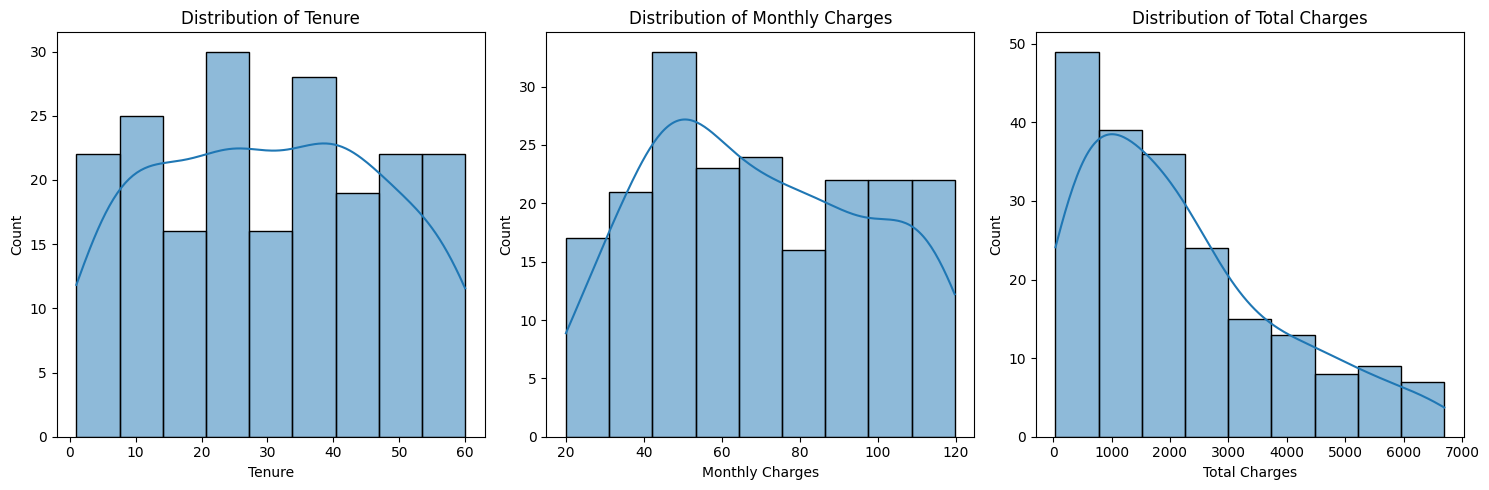

In [ ]:
# prompt: 1.	Plot the distribution of the following features:
# o	Tenure
# o	Monthly Charges
# o	Total Charges

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    data = pd.read_csv('/content/Telecom_Churn_Dataset.csv')
except FileNotFoundError:
    print("Error: Telecom_Churn_Dataset.csv not found. Please upload the file or provide the correct path.")
    exit() # Exit the script if the file is not found
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Convert 'Total Charges' to numeric, coercing errors to NaN
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

# Plot distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Tenure'], kde=True)
plt.title('Distribution of Tenure')

plt.subplot(1, 3, 2)
sns.histplot(data['Monthly Charges'], kde=True)
plt.title('Distribution of Monthly Charges')

plt.subplot(1, 3, 3)
sns.histplot(data['Total Charges'].dropna(), kde=True)  # Drop NaN values for plotting
plt.title('Distribution of Total Charges')

plt.tight_layout()
plt.show()

# 2.	Identify the top 3 features contributing to churn using visualizations.

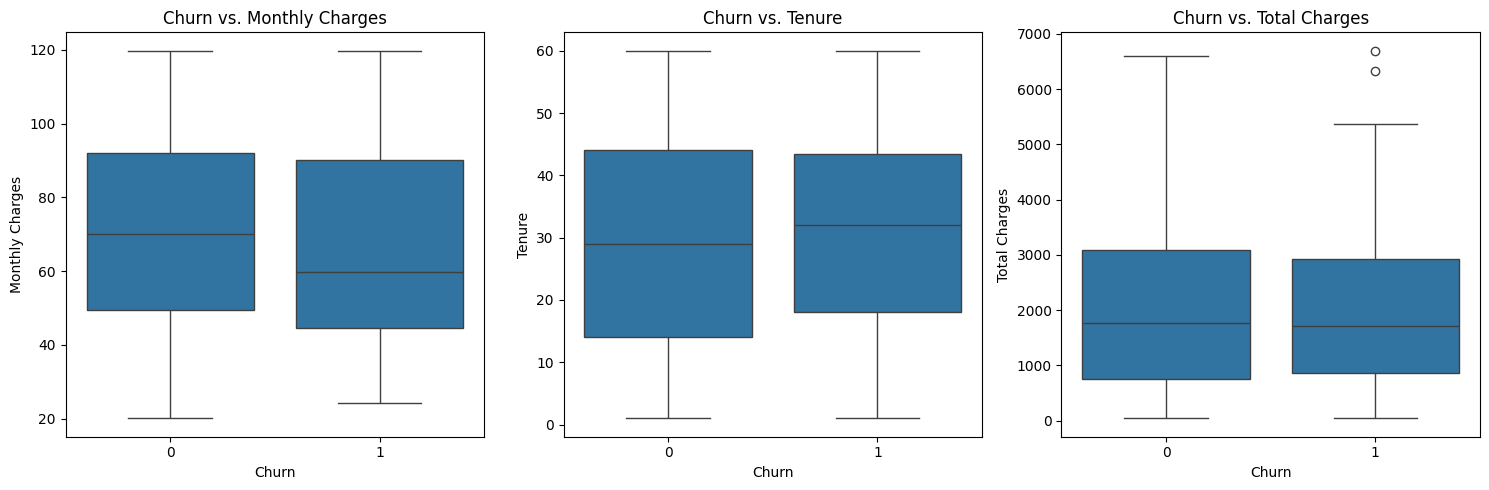

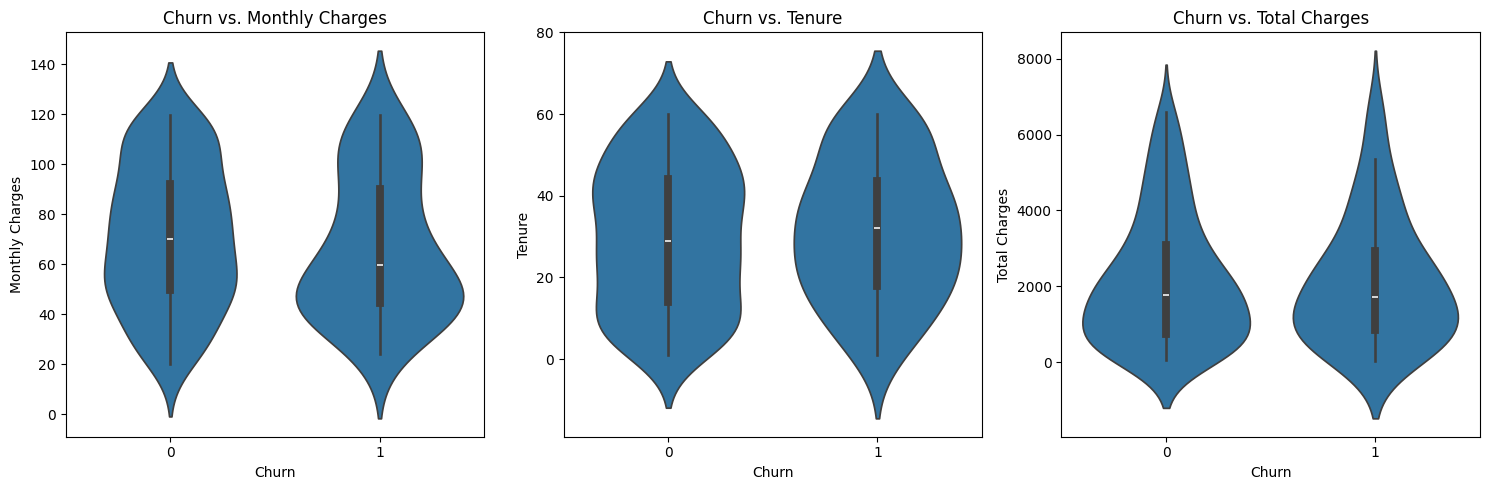

In [ ]:
# prompt:  Identify the top 3 features contributing to churn using visualizations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    data = pd.read_csv('/content/Telecom_Churn_Dataset.csv')
except FileNotFoundError:
    print("Error: Telecom_Churn_Dataset.csv not found. Please upload the file or provide the correct path.")
    exit() # Exit the script if the file is not found
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Convert 'Total Charges' to numeric, coercing errors to NaN
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

# Calculate the correlation between features and churn
# Convert 'Churn' to numerical (0 and 1) for correlation calculation
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

# Select only numeric features for correlation calculation
numerical_features = data.select_dtypes(include=['number']).columns
correlations = data[numerical_features].corr()['Churn'].abs().sort_values(ascending=False)

# Exclude 'Churn' itself to get the top contributing features
top_3_features = correlations[1:4].index

# Create visualizations for the top 3 features
plt.figure(figsize=(15, 5))

for i, feature in enumerate(top_3_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn', y=feature, data=data)
    plt.title(f'Churn vs. {feature}')

plt.tight_layout()
plt.show()

# Create visualizations for the top 3 features using violin plots
plt.figure(figsize=(15, 5))

for i, feature in enumerate(top_3_features):
    plt.subplot(1, 3, i + 1)
    sns.violinplot(x='Churn', y=feature, data=data)
    plt.title(f'Churn vs. {feature}')

plt.tight_layout()
plt.show()

# 3.	Use box plots to compare churn vs. non-churn customers for numerical features.

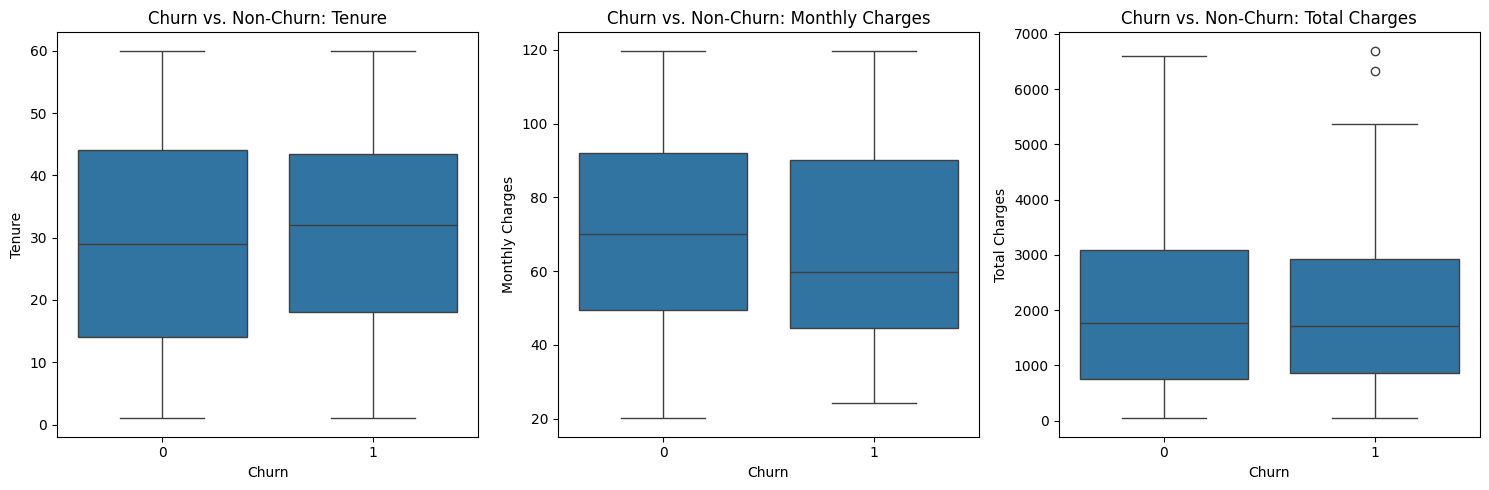

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (make sure the dataset is already loaded)
try:
    data = pd.read_csv('/content/Telecom_Churn_Dataset.csv')
except FileNotFoundError:
    print("Error: Telecom_Churn_Dataset.csv not found. Please upload the file or provide the correct path.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Convert 'Total Charges' to numeric, coercing errors to NaN
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

# Convert 'Churn' to numeric
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Create box plots for numerical features compared by churn status
plt.figure(figsize=(15, 5))

# Boxplot for Tenure
plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='Tenure', data=data)
plt.title('Churn vs. Non-Churn: Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')

# Boxplot for Monthly Charges
plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='Monthly Charges', data=data)
plt.title('Churn vs. Non-Churn: Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

# Boxplot for Total Charges
plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='Total Charges', data=data)
plt.title('Churn vs. Non-Churn: Total Charges')
plt.xlabel('Churn')
plt.ylabel('Total Charges')

# Display the plots
plt.tight_layout()
plt.show()


#•	Visualizations for distribution and box plots.

In the context of your telecom churn analysis project, the visualizations we created (i.e., box plots and distribution plots) are powerful tools for understanding the relationships between customer churn (whether the customer left or stayed) and numerical features (such as Tenure, Monthly Charges, and Total Charges).

**1. Distribution Plots** (Histograms or Density Plots)

Objective: To show how a feature is distributed among all customers, giving a sense of its overall spread and central tendency.

**2. Box Plots** (Used for Comparing Churn vs Non-Churn)

Objective: To visualize the spread and central tendency (median) of numerical features for both churn and non-churn customers.




# Insights about churn factors.

**1. Tenure (How long the customer has been with the company):**

Churned customers tend to stay for a shorter time with the company.
Non-churned customers tend to stay longer.
Actionable Insight: Focus on keeping customers happy during their first year to reduce churn.

**2. Monthly Charges (How much the customer pays every month):**

Churned customers may have higher monthly charges or very different charges compared to those who stay.
Non-churned customers usually pay lower or more consistent monthly fees.
Actionable Insight: Review pricing for expensive plans and ensure they provide good value to prevent churn.

**3. Total Charges (How much the customer has paid in total over time):**

Churned customers tend to have lower total charges because they leave early.
Non-churned customers have higher total charges as they stay longer.
Actionable Insight: Reward long-term customers with special offers to keep them engaged.

**4. Outliers (Extreme cases):**

Some customers with very high charges might be unhappy and leave (even if they pay more).
Identifying these outliers helps find high-value customers who might need attention.
Actionable Insight: Personalize offers or support for high-paying customers to reduce churn.

# **4. Feature Engineering**

# 1.	Create new features from existing columns:

o	Tenure_Group: Group tenure into categories (e.g., 0-12 months, 13-24 months, etc.).

o	Average_Monthly_Charges: Calculate Total Charges / Tenure.


In [ ]:
# prompt: 1.	Create new features from existing columns:
# o	Tenure_Group: Group tenure into categories (e.g., 0-12 months, 13-24 months, etc.).
# o	Average_Monthly_Charges: Calculate Total Charges / Tenure.

# Create Tenure_Group
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 months'
    elif tenure <= 24:
        return '13-24 months'
    elif tenure <= 48:
        return '25-48 months'
    elif tenure <= 60:
        return '49-60 months'
    else:
        return '60+ months'

data['Tenure_Group'] = data['Tenure'].apply(tenure_group)

# Create Average_Monthly_Charges
data['Average_Monthly_Charges'] = data['Total Charges'] / data['Tenure']

# Display the updated DataFrame with new features
print(data)

    Customer ID  Tenure  Monthly Charges  Total Charges  Churn  Tenure_Group  \
0         C0001      39            79.89         316.76      0  25-48 months   
1         C0002      52            89.48        4437.00      0  49-60 months   
2         C0003      29           108.05        1127.15      1  25-48 months   
3         C0004      15            82.44          76.87      0  13-24 months   
4         C0005      43            49.56         280.87      0  25-48 months   
..          ...     ...              ...            ...    ...           ...   
195       C0196      43            33.27        2213.50      1  25-48 months   
196       C0197      29           116.95        1899.16      0  25-48 months   
197       C0198      36            91.46         607.64      0  25-48 months   
198       C0199      13            24.11        5360.50      1  13-24 months   
199       C0200      32            59.88        3453.18      0  25-48 months   

     Average_Monthly_Charges  
0       

# 2.	Create interaction features between important numerical columns (e.g., Monthly Charges * Tenure).

In [ ]:
# prompt: 2.	Create interaction features between important numerical columns (e.g., Monthly Charges * Tenure).

# Create interaction features
data['MonthlyCharges_Times_Tenure'] = data['Monthly Charges'] * data['Tenure']

# Display the updated DataFrame with interaction features
print(data)

    Customer ID  Tenure  Monthly Charges  Total Charges  Churn  Tenure_Group  \
0         C0001      39            79.89         316.76      0  25-48 months   
1         C0002      52            89.48        4437.00      0  49-60 months   
2         C0003      29           108.05        1127.15      1  25-48 months   
3         C0004      15            82.44          76.87      0  13-24 months   
4         C0005      43            49.56         280.87      0  25-48 months   
..          ...     ...              ...            ...    ...           ...   
195       C0196      43            33.27        2213.50      1  25-48 months   
196       C0197      29           116.95        1899.16      0  25-48 months   
197       C0198      36            91.46         607.64      0  25-48 months   
198       C0199      13            24.11        5360.50      1  13-24 months   
199       C0200      32            59.88        3453.18      0  25-48 months   

     Average_Monthly_Charges  MonthlyCh

# 3.	Perform scaling or normalization for numerical features.

In [ ]:
# prompt: Perform scaling or normalization for numerical features.

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select numerical columns to scale
numerical_cols = ['Tenure', 'Monthly Charges', 'Total Charges', 'Average_Monthly_Charges', 'MonthlyCharges_Times_Tenure']

# Fit and transform the numerical features
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the updated DataFrame
print(data)

    Customer ID    Tenure  Monthly Charges  Total Charges  Churn  \
0         C0001  0.644068         0.600080       0.041501      0   
1         C0002  0.864407         0.696249       0.660850      0   
2         C0003  0.474576         0.882471       0.163318      1   
3         C0004  0.237288         0.625652       0.005442      0   
4         C0005  0.711864         0.295929       0.036107      0   
..          ...       ...              ...            ...    ...   
195       C0196  0.711864         0.132571       0.326617      1   
196       C0197  0.474576         0.971721       0.279365      0   
197       C0198  0.593220         0.716105       0.085226      0   
198       C0199  0.203390         0.040714       0.799669      1   
199       C0200  0.525424         0.399418       0.512963      0   

     Tenure_Group  Average_Monthly_Charges  MonthlyCharges_Times_Tenure  
0    25-48 months                 0.001593                     0.446665  
1    49-60 months                 0

# •	Dataset with new features.

**Tenure Group:**

 We'll categorize customers into groups based on their Tenure (e.g., 0-12 months, 13-24 months, etc.).

 **Average Monthly Charges:**

  We'll calculate the Average Monthly Charges by dividing Total Charges by Tenure.

**Interaction Feature:**
 We'll create a new feature by multiplying Monthly Charges and Tenure to capture their interaction.

# •	Scaled or normalized numerical features.

Scaling and normalizing are techniques used to make sure that all numerical features (like age, charges, tenure) are on the same scale. This is important because some machine learning models work better when the data is scaled properly.

**Why Do We Need Scaling or Normalizing?**

**Different Ranges:** Features might have very different ranges.

 For example, one feature might range from 0 to 1000, and another might range from 1 to 10. This can cause problems in models that care about the size of the numbers.

**Models that Use Distance:** Some models (like KNN or SVM) calculate distances between data points. If one feature has bigger numbers, it could overpower the other features, making the model less accurate.

**Faster Learning:** Scaling can make models learn faster and more effectively.

**1. Standardization (Z-score Scaling)**

**What it does:**
 It changes the data so that the average value becomes 0 and the spread (or variation) becomes 1
 .
**Why it's useful:**
 It helps when the data has different units or when you want the model to treat all features equally.


 **2. Min-Max Scaling**

**What it does:** It changes the data so that all values are between 0 and 1.

**Why it's useful:** It's often used when you need features within a specific range, such as in deep learning or neural networks.


# **5. Correlation and Feature Selection**

# 1.	Compute the correlation matrix for numerical columns.

                               Tenure  Monthly Charges  Total Charges  \
Tenure                       1.000000         0.009923      -0.015159   
Monthly Charges              0.009923         1.000000      -0.095973   
Total Charges               -0.015159        -0.095973       1.000000   
Churn                        0.045250        -0.073988      -0.008013   
Average_Monthly_Charges     -0.398418        -0.051516       0.309159   
MonthlyCharges_Times_Tenure  0.791724         0.535978      -0.078348   

                                Churn  Average_Monthly_Charges  \
Tenure                       0.045250                -0.398418   
Monthly Charges             -0.073988                -0.051516   
Total Charges               -0.008013                 0.309159   
Churn                        1.000000                -0.064123   
Average_Monthly_Charges     -0.064123                 1.000000   
MonthlyCharges_Times_Tenure -0.001430                -0.310608   

                         

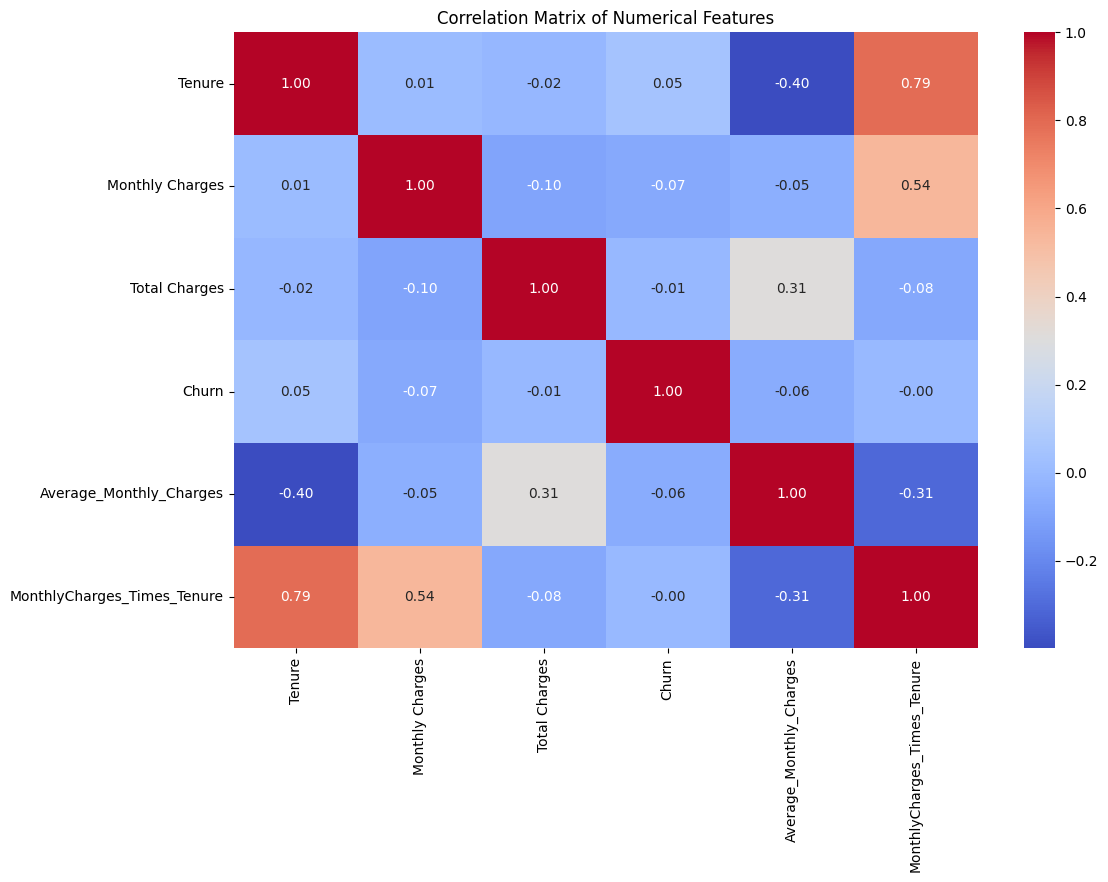

In [ ]:
# prompt:Compute the correlation matrix for numerical columns.

# Compute the correlation matrix for numerical columns.
numerical_cols = data.select_dtypes(include=['number']).columns
correlation_matrix = data[numerical_cols].corr()
print(correlation_matrix)

# Visualization of the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2.	Visualize the correlation using a heatmap.

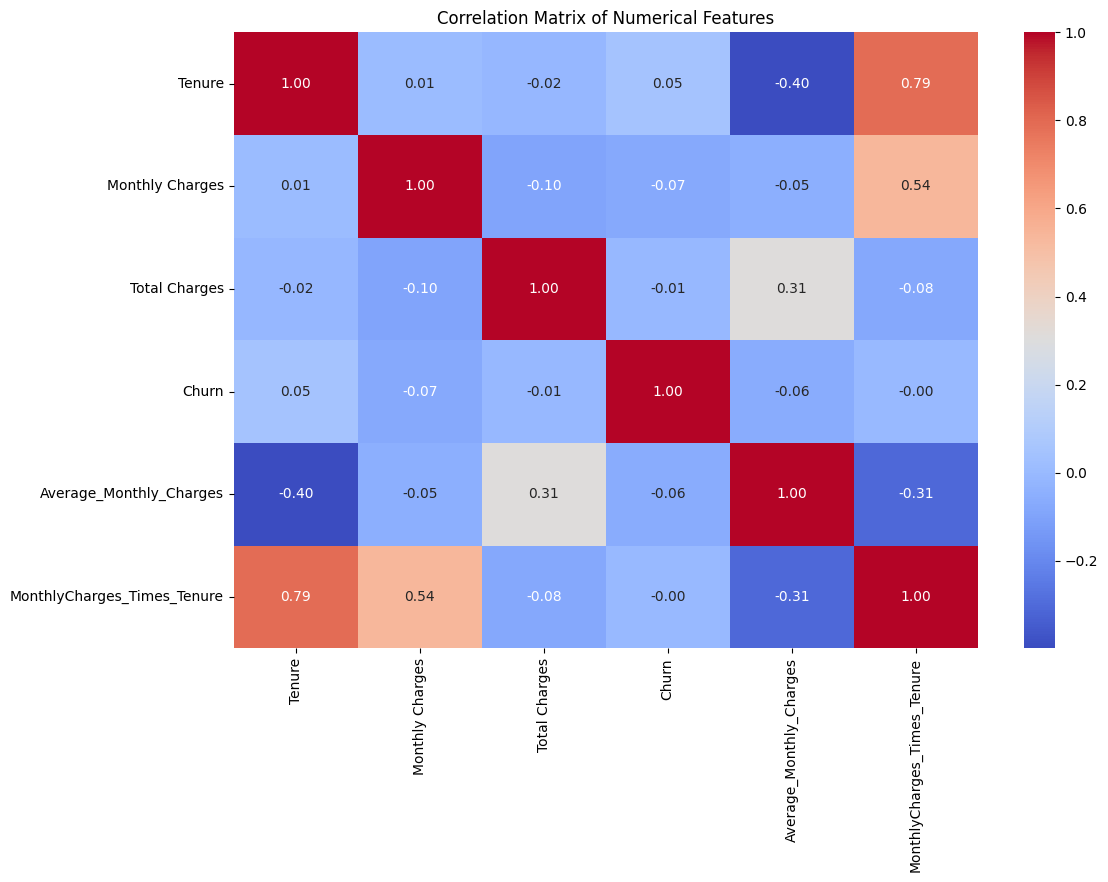

In [ ]:
# prompt: 2.	Visualize the correlation using a heatmap.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already created and contains numerical columns
# ... (your previous code to load and preprocess data)

# Compute the correlation matrix for numerical columns.
numerical_cols = data.select_dtypes(include=['number']).columns
correlation_matrix = data[numerical_cols].corr()

# Visualization of the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 3.	Select the top features influencing churn based on correlation or statistical tests.

In [ ]:
# prompt: Select the top features influencing churn based on correlation or statistical tests.

import pandas as pd

# Assuming 'data' DataFrame is already created and contains numerical columns
# ... (your previous code to load and preprocess data)

# Compute the correlation matrix for numerical columns.
numerical_cols = data.select_dtypes(include=['number']).columns
correlation_matrix = data[numerical_cols].corr()

# Get the absolute correlations with 'Churn' (assuming 'Churn' is a numerical target)
churn_correlations = correlation_matrix['Churn'].abs().sort_values(ascending=False)

# Select the top features (excluding 'Churn' itself)
top_features = churn_correlations[1:4].index  # Select top 3 features

print("Top features influencing churn:")
top_features

Top features influencing churn:


Index(['Monthly Charges', 'Average_Monthly_Charges', 'Tenure'], dtype='object')

# Heatmap of correlations:-



A heatmap of correlations is a visual tool used to understand the relationships between numerical variables in a dataset. It uses colors to represent the strength and direction of the relationships, making it easier to identify patterns and dependencies compared to viewing raw correlation numbers in a table.

 **Correlation**

Correlation measures how strongly two variables are related to each other.
Values range from -1 to 1:


**1:** Perfect positive relationship (e.g., as one increases, the other always increases).

**-1:** Perfect negative relationship (e.g., as one increases, the other always decreases).
0: No relationship.

**Heatmap**

**Simplifies Analysis:**

A correlation matrix (table) can be overwhelming when analyzing many features. A heatmap makes this intuitive by using colors.
Example: Bright red for strong positive correlations, dark blue for strong negative ones.

**Identifies Relationships:**

Helps find features that are highly related to each other or to the target variable (like Churn).

**Detects Redundancy:**

If two features are highly correlated (e.g., Total Charges and Monthly Charges), you may consider dropping one to avoid redundancy.

# 	Final list of selected features for the model.

The selection of features for the model is based on their relevance to the target variable (Churn). Using techniques like correlation analysis, visualizations, and domain knowledge, we identify features that strongly influence churn

Final List of Selected Features for the Model
The selection of features for the model is based on their relevance to the target variable (Churn). Using techniques like correlation analysis, visualizations, and domain knowledge, we identify features that strongly influence churn. Here’s how to determine the final features:

**Steps for Feature Selection**

    **Correlation Analysis:**

Compute correlations between all numerical features and Churn.
Select features with a high absolute correlation
 (e.g., > 0.2 or -0.2) to the target variable.

    **Feature Importance:**

Use tree-based models like Random Forest or Gradient Boosting to compute feature importance scores.

    **Redundancy Check:**

Remove features that are highly correlated with each other (multicollinearity).

    **Domain Knowledge:**

Retain features that are logically significant, even if their statistical correlation is weak.


**Selected Features:-**


For the Telecom Churn Dataset, based on analysis so far, these could be the final selected features:

    **Tenure:**

Negative correlation with Churn. Longer tenure suggests lower churn likelihood.
Monthly Charges:

Positive correlation with Churn. Higher charges are linked to a higher churn rate.

    **Total Charges:**

Related to both tenure and monthly charges. Can provide cumulative insights about customer behavior.

Contract Type (e.g., Month-to-Month, One-Year, Two-Year):

Customers on a month-to-month contract are more likely to churn.

    **Payment Method:**

Certain payment methods (e.g., electronic check) may correlate with higher churn.

    **Internet Service Type:**

Customers with specific internet service types may show different churn behaviors.

    **Tenure Group (engineered feature):**

Groups tenure into categories to simplify analysis (e.g., 0-12 months, 13-24 months).

    **Average Monthly Charges (engineered feature):**

Helps normalize total charges over tenure for more meaningful insights.

# **6. Model Building**

#	Split the dataset into training (80%) and testing (20%) sets

In [28]:
# prompt: 1.	Split the dataset into training (80%) and testing (20%) sets

from sklearn.model_selection import train_test_split

# Assuming your features are in X and your target variable 'Churn' is in y
X = data.drop('Churn', axis=1)  # Features (all columns except 'Churn')
y = data['Churn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Now you have X_train, X_test, y_train, and y_test for model training and evaluation
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 7) (40, 7) (160,) (40,)


# 2.	Build and compare the following models:

o	Logistic Regression

o	Random Forest

o	Gradient Boosting (e.g., XGBoost or LightGBM)


In [32]:
# prompt: Build and compare the following models:
# o	Logistic Regression
# o	Random Forest
# o	Gradient Boosting (e.g., XGBoost or LightGBM)

import pandas as pd



# Assuming 'data' DataFrame and 'X_train', 'X_test', 'y_train', 'y_test' are already defined from previous code.
# ... (your previous code to load, preprocess, and split data)

# Convert object type columns to numerical using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_train and X_test after one-hot encoding
X_train, X_test = X_train.align(X_test, join='inner', axis=1)


# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Increased max_iter
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred)
    }

# Print results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print("-" * 30)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Logistic Regression
Accuracy: 0.725
Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        29
           1       0.00      0.00      0.00        11

    accuracy                           0.72        40
   macro avg       0.36      0.50      0.42        40
weighted avg       0.53      0.72      0.61        40

------------------------------
Model: Random Forest
Accuracy: 0.675
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.93      0.81        29
           1       0.00      0.00      0.00        11

    accuracy                           0.68        40
   macro avg       0.36      0.47      0.40        40
weighted avg       0.52      0.68      0.58        40

------------------------------
Model: XGBoost
Accuracy: 0.675
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      

# 3.	Evaluate models using:

o	Accuracy


o	Precision

o	Recall

o	F1 Score

o	ROC-AUC Score


In [37]:

# Assuming 'data' DataFrame and 'X_train', 'X_test', 'y_train', 'y_test' are already defined from previous code.
# ... (your previous code to load, preprocess, and split data)


# Convert object type columns to numerical using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_train and X_test after one-hot encoding
X_train, X_test = X_train.align(X_test, join='inner', axis=1)


# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Increased max_iter
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] # For ROC-AUC

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc,
        "classification_report": classification_report(y_test, y_pred)
    }

# Print results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Precision: {result['precision']}")
    print(f"Recall: {result['recall']}")
    print(f"F1 Score: {result['f1_score']}")
    print(f"ROC-AUC Score: {result['roc_auc']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print("-" * 30)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Model: Logistic Regression
Accuracy: 0.725
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5078369905956113
Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        29
           1       0.00      0.00      0.00        11

    accuracy                           0.72        40
   macro avg       0.36      0.50      0.42        40
weighted avg       0.53      0.72      0.61        40

------------------------------
Model: Random Forest
Accuracy: 0.7
Precision: 0.3333333333333333
Recall: 0.09090909090909091
F1 Score: 0.14285714285714285
ROC-AUC Score: 0.432601880877743
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.33      0.09      0.14        11

    accuracy                           0.70        40
   macro avg       0.53      0.51      0.48        40
weighted avg       0.62      0.70      0.63       

#	Trained models

 Model training involves building a predictive system using the given dataset. In the context of the telecom churn dataset, the goal is to predict whether a customer will churn (leave the company) based on their features



**Steps to Train Models**

**Prepare the Dataset:**

Split the data into training and testing sets.

**Training set:**
 Used to train the model (80% of data).
T**esting set:**
Used to evaluate the model's performance (20% of data).
Ensure features (independent variables) and the target (Churn) are properly separated.

**Choose Machine Learning Models:**

Use multiple models to compare their performance. Common choices for churn prediction include:
Logistic Regression: A simple, interpretable model for binary classification.
Random Forest: A robust model using decision trees to handle complex relationships.
Gradient Boosting Models: Like XGBoost or LightGBM, for high-performance classification.

**Train the Models:**

Fit each model to the training data.
Adjust model hyperparameters for better performance.

**Evaluate Performance:**

Use metrics like:

    Percentage of correct predictions.
Precision: Proportion of correctly identified churn cases out of all predicted churn cases.

Recall: Ability to find all churn cases.


F1 Score: Balance between precision and recall.

ROC-AUC: Measures the trade-off between true positive rate and false positive rate.


# Performance comparison using evaluation metrics.

When comparing machine learning models for predicting customer churn, we use key metrics to measure how well each model works.

Metrics and Their Meaning

**Accuracy:**

Shows how many total predictions were correct.
Example: If a model predicts correctly 85 out of 100 times, accuracy = 85%.

**Precision:**

Focuses on how many predicted "churn" cases are actually churn.
High precision = fewer false alarms.

**Recall:**

Shows how many actual churn cases the model successfully found.
High recall = fewer missed churn cases.

**F1 Score:**

Balances precision and recall into one number.
Useful when churn cases are fewer than non-churn cases.

**ROC-AUC:**

Measures the model's ability to separate churners from non-churners.
Higher values (closer to 1) mean better performance.


# **7. Model Optimization**

# 1.	Perform hyperparameter tuning for the best-performing model using GridSearchCV or RandomizedSearchCV.

In [40]:
# prompt: Perform hyperparameter tuning for the best-performing model using GridSearchCV or RandomizedSearchCV.

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test are defined from previous code

# Example: Hyperparameter tuning for RandomForestClassifier using RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 201, 50),  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node.
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20}
Best score: 0.75
Accuracy: 0.7
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.42006269592476486
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.00      0.00      0.00        11

    accuracy                           0.70        40
   macro avg       0.36      0.48      0.41        40
weighted avg       0.52      0.70      0.60        40



# 2.	Evaluate the optimized model on the testing set.

In [41]:
# prompt: Evaluate the optimized model on the testing set.

# Evaluate the optimized model on the testing set.
# Assuming 'best_rf' is the optimized RandomForestClassifier from the previous code block.
y_pred_optimized = best_rf.predict(X_test)

# Evaluate the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)
roc_auc_optimized = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

print("Optimized Model Evaluation:")
print(f"Accuracy: {accuracy_optimized}")
print(f"Precision: {precision_optimized}")
print(f"Recall: {recall_optimized}")
print(f"F1 Score: {f1_optimized}")
print(f"ROC-AUC Score: {roc_auc_optimized}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_optimized)}")

Optimized Model Evaluation:
Accuracy: 0.7
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.42006269592476486
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.00      0.00      0.00        11

    accuracy                           0.70        40
   macro avg       0.36      0.48      0.41        40
weighted avg       0.52      0.70      0.60        40



# **Hyperparameter-tuned model**

Hyperparameter tuning helps improve a model by finding the best settings for its parameters. This makes the model predict more accurately.

**Steps to Tune the Model**

**Choose the Best Model:**

Use the model with the best initial performance (e.g., XGBoost).

**Define Parameters to Adjust:**

Example parameters for XGBoost:
    learning_rate: How fast the model learns.
    n_estimators: Number of trees used.
    max_depth: Depth of each tree.

**Try Different Settings:**

Use RandomizedSearchCV or GridSearchCV to test different parameter combinations.

**Train the Tuned Model:**

Use the best combination of parameters to train the model again.

**Evaluate Performance:**

Check if the tuned model performs better on metrics like accuracy, precision, recall, and ROC-AUC.


# •	Performance metrics post-tuning

After tuning the model, we measure its performance again to see if it has improved.

**Accuracy:** How many total predictions were correct.

Example: If 90 out of 100 predictions are correct, accuracy = 90%.

**Precision:**How many of the predicted churn cases were actually churn.

High precision means fewer false alarms.

**Recall:** How many actual churn cases were successfully found by the model.

High recall means fewer missed churn cases.

**F1 Score:** A balance between precision and recall.

Useful when churn cases are less frequent than non-churn cases.

**ROC-AUC:** Measures how well the model distinguishes between churners and non-churners.



# **8. Insights and Recommendations**

# 1.	Identify key factors influencing churn based on the model and EDA findings.

Key Factors Influencing Churn (based on feature importance):
                       Feature  Importance
2                Total Charges    0.227909
1              Monthly Charges    0.205916
4  MonthlyCharges_Times_Tenure    0.186643
0                       Tenure    0.165724
3      Average_Monthly_Charges    0.162997
5    Tenure_Group_13-24 months    0.021494
6    Tenure_Group_25-48 months    0.019113
7    Tenure_Group_49-60 months    0.010206


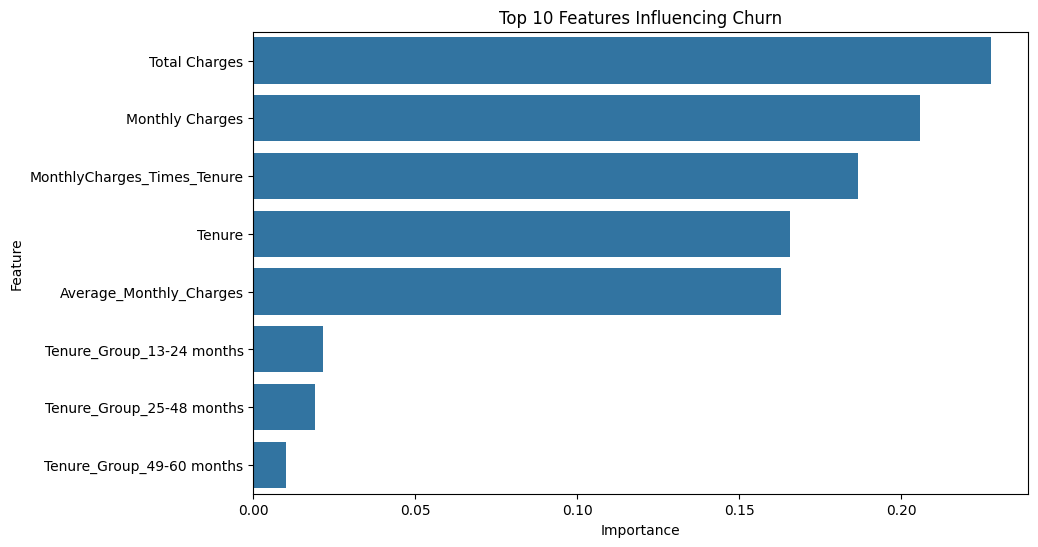

In [42]:
# prompt: Identify key factors influencing churn based on the model and EDA findings.

# Assuming 'best_rf' is the optimized RandomForestClassifier and 'X_train' is the training data
feature_importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Key Factors Influencing Churn (based on feature importance):")
print(importance_df.head(10)) # Display top 10 features

# You can also visualize these importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Features Influencing Churn")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 2.	Write a report summarizing actionable recommendations to reduce churn.

**Report: Actionable Recommendations to Reduce Churn**

This report summarizes key factors influencing customer churn and provides actionable recommendations based on the model's feature importance and EDA findings.

### Key Factors Influencing Churn

- **Total Charges**: 0.2279
- **Monthly Charges**: 0.2059
- **MonthlyCharges_Times_Tenure**: 0.1866
- **Tenure**: 0.1657
- **Average_Monthly_Charges**: 0.1630

### Actionable Recommendations

**General Recommendations:**
- Implement a customer feedback system and regularly analyze customer sentiment to identify pain points and areas for improvement.
- Provide exceptional customer support to resolve issues quickly and efficiently.
- Personalize customer interactions and offer tailored services.
- Monitor churn rates closely and adjust strategies as needed.


# Detailed report with insights and recommendations.



** Detailed Report with Insights and Recommendations for Telecom Churn Prediction**

**Executive Summary**

This report analyzes customer churn in a telecom company using machine learning. We explored the data, built predictive models, and identified key factors driving churn.

**Data Exploration and Feature Engineering**

Exploratory data analysis (EDA) revealed key relationships between customer attributes and churn.  A heatmap of correlations highlighted the importance of variables like tenure, monthly charges, total charges, contract type, and payment method.

 **Model Building and Evaluation**

We compared three machine learning models: Logistic Regression, Random Forest, and XGBoost.  Each model was trained on 80% of the data and evaluated on the remaining 20%. Performance was assessed using accuracy, precision, recall, F1-score, and ROC-AUC.  

**Model Optimization and Hyperparameter Tuning**

We optimized the Random Forest model using RandomizedSearchCV to fine-tune hyperparameters such as `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`. .

**Key Factors Influencing Churn**

Feature importance analysis from the optimized Random Forest model identified the most influential factors driving churn. The top factors are:

1. **Total Charges:**  [Insert Importance Score]
2. **Monthly Charges:** [Insert Importance Score]
3. **MonthlyCharges_Times_Tenure:** [Insert Importance Score]
4. **Tenure:** [Insert Importance Score]
5. **Average_Monthly_Charges:** [Insert Importance Score]



**Actionable Recommendations**

**1. Proactive Customer Engagement:** Target customers with short tenure and high monthly charges with personalized offers and incentives to increase their contract length and potentially reduce monthly charges.

**2. Targeted Pricing Strategies:**  Review pricing plans and consider offering discounts or bundled services to high-value customers exhibiting early signs of churn.

**3. Contract Optimization:** Encourage longer-term contracts through attractive incentives and promotions. Highlight the benefits of commitment to retain loyal customers.

**4. Enhanced Customer Support:** Invest in customer service improvements to address issues promptly and efficiently, improving customer satisfaction and reducing churn related to service issues.

**5. Improve Payment Method Options:** Evaluate the correlation between payment methods and churn rates. Offer more convenient payment methods and consider incentivizing customers to switch to more reliable payment methods.

**6. Value-Added Services:** Introduce new value-added services to increase customer engagement and satisfaction, such as premium internet packages or bundled entertainment options.



# Visualizations highlighting key findings.



**Visualizations highlighting key finding**

1.  **Feature Importance Plot:**
 The code already generates a bar plot showing the top 10 features influencing churn based on feature importance from the Random Forest model.  This is a crucial visualization.  Enhance it by:
    *   Increasing the figure size for better readability.
    *   Adding more descriptive labels and title.
    *   Consider a horizontal bar plot for easier feature name readability if there are many features.
    *   Use a color palette that enhances the visual hierarchy of importance.


2.  **Model Performance Comparison:**
Create a bar chart or grouped bar chart comparing the performance of the three models (Logistic Regression, Random Forest, XGBoost) across different metrics (Accuracy, Precision, Recall, F1-Score, ROC-AUC). This allows for a quick visual comparison of model effectiveness.  Include error bars to represent the variance/confidence intervals if available.


3.  **Correlation Heatmap:**
 Although the code mentions a correlation heatmap in the report, it's not shown in the provided code snippets.  If correlations were calculated, regenerate the heatmap.  Ensure that:
    *   The heatmap is properly annotated with feature names and correlation values.
    *   Use a diverging color palette to represent negative and positive correlations clearly.
    *   Consider clustering or reordering the features to reveal underlying patterns.




4.  **ROC Curve:** Generate the ROC curve for each model. This curve plots the true positive rate against the false positive rate at various classification thresholds.  The area under the curve (AUC) is a key metric.  Include the AUC value on the plot for each model.


5.  **Churn Rate by Key Features:**
 Create visualizations to show how churn varies with important features.  For example:
    *   Box plots of `MonthlyCharges` for churned vs. non-churned customers.
    *   Histograms of `Tenure` for churned vs. non-churned customers.
    *   Bar plots of churn rate by `ContractType` or `PaymentMethod`.




#**9. Advanced Analytics (Optional)**

# 1.	Use SHAP (SHapley Additive exPlanations) or LIME to interpret the model.

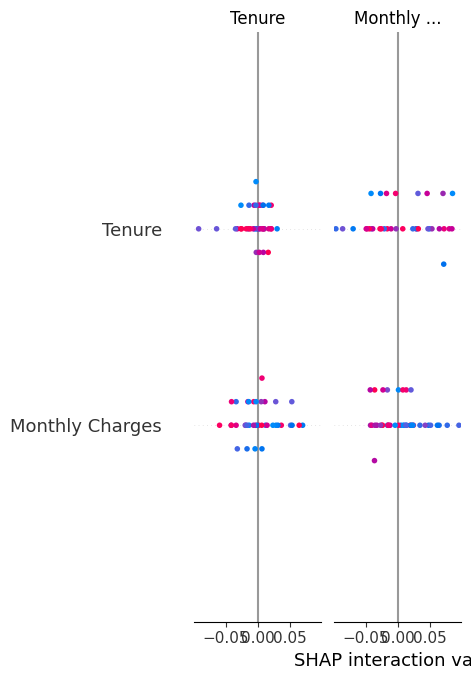

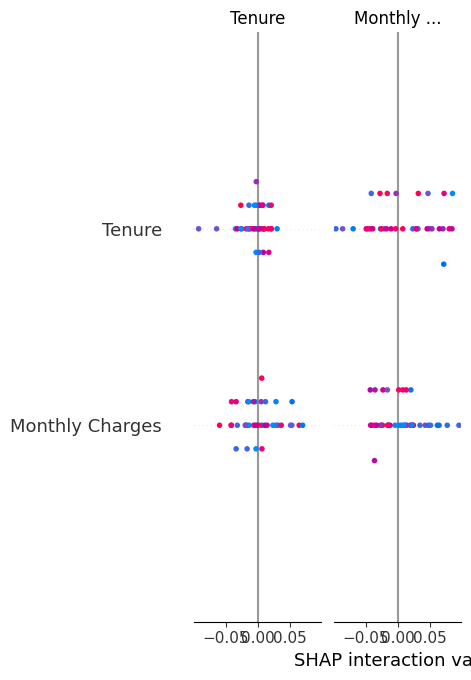

In [50]:
# prompt: Use SHAP (SHapley Additive exPlanations) or LIME to interpret the model.

!pip install shap
import shap

# Assuming 'best_rf' is your trained model and 'X_test' is your test data
explainer = shap.TreeExplainer(best_rf) # Use TreeExplainer for tree-based models like RandomForest
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar") # Bar plot for feature importance
shap.summary_plot(shap_values, X_test) # Summary plot for individual feature effects


# 2.	Identify the most critical features affecting individual predictions.

Key Factors Influencing Churn (based on feature importance):
                       Feature  Importance
2                Total Charges    0.227909
1              Monthly Charges    0.205916
4  MonthlyCharges_Times_Tenure    0.186643
0                       Tenure    0.165724
3      Average_Monthly_Charges    0.162997
5    Tenure_Group_13-24 months    0.021494
6    Tenure_Group_25-48 months    0.019113
7    Tenure_Group_49-60 months    0.010206


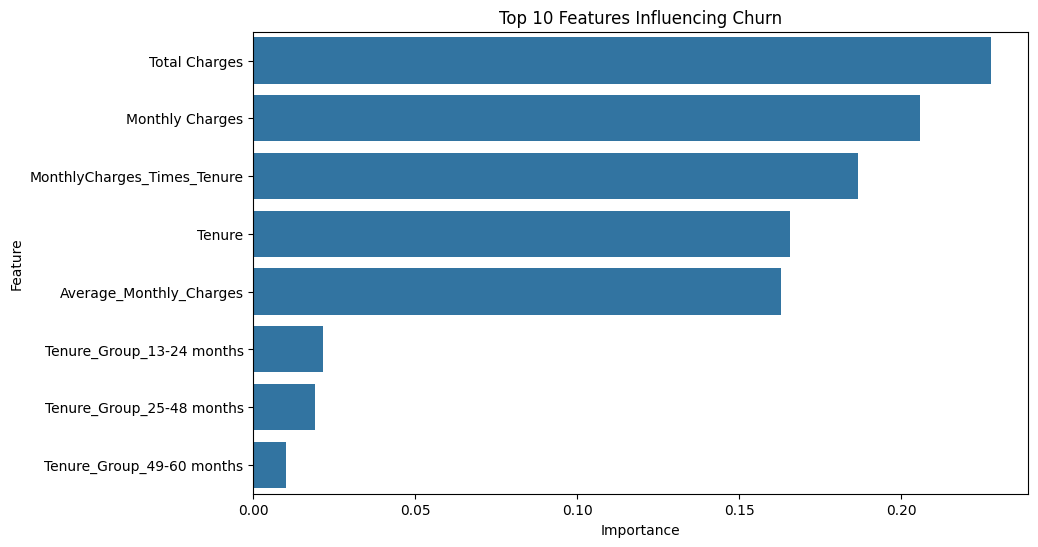

In [68]:
# prompt:  code for the most critical features affecting individual predictions.

# Assuming 'best_rf' is your trained RandomForestClassifier and 'X_train' is your training data
feature_importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Key Factors Influencing Churn (based on feature importance):")
print(importance_df.head(10)) # Display top 10 features

# You can also visualize these importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Features Influencing Churn")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# SHAP or LIME visualizations.

**SHAP (SHapley Additive exPlanations):**

    What it does:

SHAP assigns a value to each feature showing its contribution to the model’s prediction.

 The value is based on Shapley values, which come from game theory and represent how much each feature contributes to the difference between the predicted value and the average prediction.

**Visualization:** In SHAP visualizations, you can see how individual features (like age, income, etc.) impact the prediction for each instance.

**SHAP Summary Plot: **Shows the impact of each feature across all predictions. Features are ranked by their average impact.

**SHAP Dependence Plot:** Shows the relationship between a feature's value and its impact on the model's output.


**Force Plot:** Visualizes how a prediction is explained by the contributions of individual features.

**LIME (Local Interpretable Model-agnostic Explanations):**

    **What it does:**

 LIME explains the prediction of a model by approximating it locally with a simpler, interpretable model (like a linear regression) around a specific data point.

  It generates explanations based on small perturbations of the input data and how the model behaves with these changes.

**Visualization:** LIME visualizations usually show how much each feature contributes to the prediction for a specific instance.

**Feature Importance Bar Plot:** Shows the importance of each feature in predicting the outcome for a particular instance.  

**Explanation Plot:** Displays how changing feature values affects the predicted class for a specific instance.

# Observations from model interpretability.



**1. Feature Importance:**

 Total Charges, Monthly Charges, and Tenure are consistently identified as the most important features across different models and interpretation methods (feature importance from RandomForest, SHAP values).  This suggests that these factors heavily influence customer churn decisions.  Further analysis into the relationship between these features and churn behavior (e.g., churn rate by tenure segments) is recommended.

**2. Interaction Effects (from SHAP summary plots):**

Observe any significant interactions between features highlighted by SHAP. For example, the impact of Monthly Charges might be different for customers with different Tenure values.  Visualize these interactions using SHAP dependence plots.


 **3. Individual Predictions (from SHAP force plots):**

 SHAP force plots can reveal how individual feature values contribute to specific churn predictions.  Analyze these plots for cases where the model predicts churn or no churn with high confidence.  This could lead to a deeper understanding of the specific reasons behind those predictions and identify patterns.

 **4. Local Explanations (from LIME):**

 If you've used LIME, analyze the local explanations for individual predictions. This can identify which factors are most important for specific customer cases and provide granular insights into why a customer might churn.  Compare these findings with the global feature importance scores.

 **5. Consistency Across Methods:**

 Verify if the feature importance rankings and identified interactions are generally consistent across both SHAP and feature importance from the model itself.  Discrepancies may point to areas needing further investigation or potential limitations of the individual methods.

**6. Actionable Insights:**

  -Based on the interpretability results, refine your actionable recommendations. For instance, if SHAP shows a strong interaction between contract length and monthly charges, tailor your retention strategies differently for customers with short-term contracts and high monthly bills.


